In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk 

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market, columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
print(df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

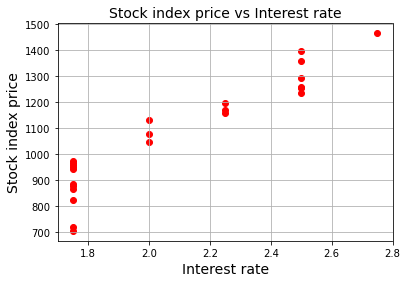

In [3]:
# plotting stock index price with interest rate
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock index price vs Interest rate', fontsize=14)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Stock index price', fontsize=14)
plt.grid(True)
plt.show()                                    
                                    

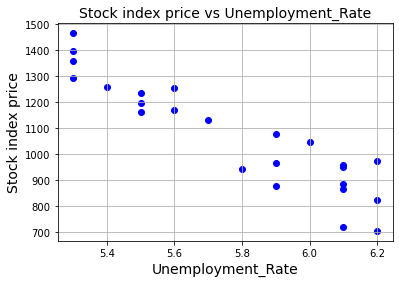

In [4]:
# plotting stock index price with unemployment rate
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='blue')
plt.title('Stock index price vs Unemployment_Rate', fontsize=14)
plt.xlabel('Unemployment_Rate', fontsize=14)
plt.ylabel('Stock index price', fontsize=14)
plt.grid(True)
plt.show()        

In [11]:
# performing multiple linear regression 
X = df[['Interest_Rate','Unemployment_Rate']].astype(float)
Y = df['Stock_Index_Price'].astype(float)
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
root = tk.Tk()
canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)
entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)
def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Interest_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Stock_Index_Price']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Unemployment_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Stock_Index_Price']) 
ax4.set_xlabel('Unemployment_Rate')
ax4.set_title('Unemployment_Rate Vs. Stock Index Price')




root.mainloop()




# prediction with new data 
#New_Interest_Rate = 2.75
#New_Unemployment_Rate = 5.3
#print('predicted stock index price:\n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))






intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
